In [1]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Data file
#This is the file contaning all K9 Toss and Fetch data from the beginning of the leauge till end of 2019
fname = 'league scores full master 1-14-20.xlsx'
allseasons = pd.read_excel(fname,sheet_name='All Time by SEASONS', header=6)

In [3]:
#Handle missing last names
allseasons['Last '] = allseasons['Last '].fillna('')

#Create new column with full name
firstn = allseasons['First '].to_numpy()
lastn = allseasons['Last '].to_numpy()
fulln = firstn +' '+ lastn
allseasons['Full_Name']= pd.DataFrame(fulln)

In [4]:
def get_databyseason(season, data):
    '''This function can be used to find the total number of unique players in a given season
        It takes the requested  season in form 001-YYYY-SEASON and the dataFrame containing 
        the season information.
        This function returns a dataframe containg all info for the given season'''
    
    dfseason = data[data['Season']==season]
    return dfseason
    

In [5]:
dseason='001-2015-FALL'
singleseason = get_databyseason(dseason, allseasons)


In [6]:
def count_players(data):
    '''This function counts the number of unique players calculated by unique player names.
       This function takes a pandas dataframe  and returns the total number of unique players'''
    players = data.Full_Name.unique()
    size = np.size(players)
    return size
    

In [7]:
print(count_players(singleseason))

50


In [8]:
#array containing all season strings
seasons = allseasons.Season.unique()
#array containing count of seasons
p_count =[]
for s in seasons:
    data = get_databyseason(s, allseasons)
    p_count.append(count_players(data))
print(p_count)
    

[50, 113, 118, 106, 164, 432, 398, 546, 633, 472, 874, 900, 964, 1161, 820, 1478, 1523, 1441, 1333]


In [9]:
%matplotlib inline
season_num = np.arange(1,20)
print (season_num)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


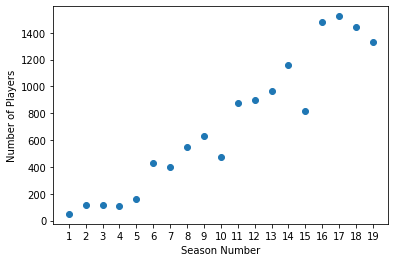

In [10]:
plt.scatter(season_num, p_count)
xi = season_num
plt.xlabel('Season Number')
plt.ylabel('Number of Players')
plt.xticks(xi, season_num)
plt.show()

In [11]:
allseasons.Season.unique()

array(['001-2015-FALL', '002-2016-SPRING', '003-2016-Summer',
       '004-2016-Fall', '005-2016-WINTER', '006-2017-SPRING',
       '007-2017-SUMMER', '008-2017-FALL', '009-2017-WINTER',
       '010-2018-SDUnder', '011-2018-SPRING', '012-2018-SUMMER',
       '013-2018-FALL', '014-2018-WINTER', '015-2019-SDUnder',
       '016-2019-SPRING', '017-2019-SUMMER', '018-2109-FALL',
       '019-2109-WINTER'], dtype=object)

In [12]:
#There are a few issues with the dog breed column, first capitalization is completely random
#Next Breeds were not recorded until Summer 2019, we may try filling known info later

#this line will fill the NAN values with an empty string
allseasons['Breed']=allseasons['Breed'].fillna('')

#Next we will add a 'cleaned' column to the existing dataframe
breed = allseasons['Breed']
cleanbreed = breed.str.lower()
allseasons['Breed_Cleaned']= cleanbreed

In [13]:
allseasons.tail()

,Season,Total Teams,Overall,b,First,Last,Division,By Division,Dog,Breed,...,Week 3,Week 4,Week 5,MUL,H-CAP,Total Score,Club Points,Promotions,Full_Name,Breed_Cleaned
18511,019-2109-WINTER,1782,1770,A,jennifer,Zelenak,HANDLER,1192.0,Dakota,German Shepherd Dog,...,,,,,10,10.0,NaN,NaN,jennifer Zelenak,german shepherd dog
18512,019-2109-WINTER,1782,1770,A,Lisa,Hawkins,HANDLER,1192.0,Lyla,Labrador Retriever,...,,,,,10,10.0,NaN,NaN,Lisa Hawkins,labrador retriever
18513,019-2109-WINTER,1782,1770,A,Tom,Mwaniki,HANDLER,1192.0,Moya,Miniature American Shepherd,...,0,,,,10,10.0,NaN,NaN,Tom Mwaniki,miniature american shepherd
18514,019-2109-WINTER,1782,1781,B,Mark,Vitullo,EXPERT,125.0,Lulu,German Shepherd Dog,...,0,,,,,5.0,,NaN,Mark Vitullo,german shepherd dog
18515,019-2109-WINTER,1782,1782,A,Taylor,,HANDLER,NaN,Cali,,...,,3,,,,3.0,NaN,NaN,Taylor,


In [14]:
np.size(allseasons.Breed_Cleaned.unique())

160

In [15]:
avgbybreed = allseasons.groupby(['Breed_Cleaned']).mean()

In [16]:
print(avgbybreed)

                              Total Teams      Overall  By Division  \
Breed_Cleaned                                                         
                              1185.404631   594.909936   625.827338   
airedale terrier              1911.400000   878.200000   534.200000   
akita                         2031.000000  1291.000000   812.000000   
alaskan malamute              1782.000000  1163.000000   717.000000   
american bulldog              1981.000000   245.000000    74.000000   
...                                   ...          ...          ...   
welsh corgi, cardigan         1872.363636   887.818182   528.727273   
welsh corgi, pembroke         1926.727273  1046.818182   603.545455   
whippet                       1928.704082   853.704082   426.285714   
white shepherd                1856.500000   970.500000   632.500000   
wirehaired pointing\ngriffon  1931.000000  1547.000000  1046.000000   

                               Total Score  
Breed_Cleaned                  

<IPython.core.display.Javascript object>


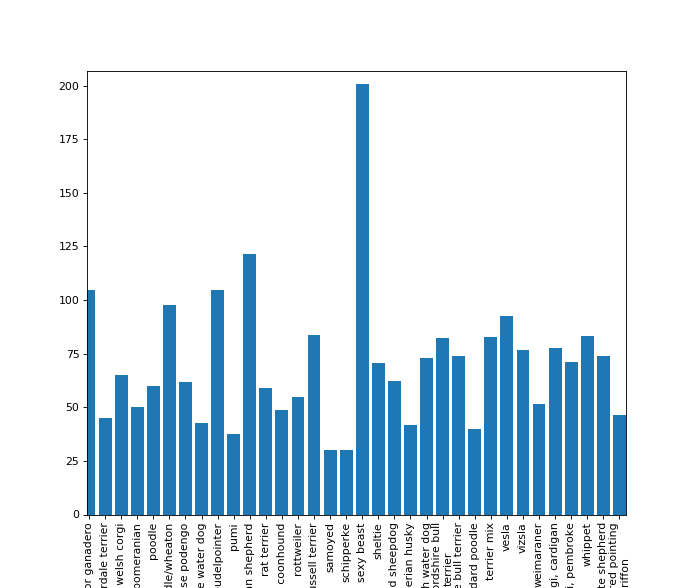

In [19]:
breedplot = avgbybreed.index.to_numpy()
#print(breedplot)
avgscore = avgbybreed[' Total Score']
%matplotlib notebook
plt.bar(breedplot, avgscore)
plt.xticks(rotation = 90)
plt.show()

In [18]:
print(breedplot)

['' 'airedale terrier' 'akita' 'alaskan malamute' 'american bulldog'
 'american bully' 'american cocker\nspaniel' 'american hairless\nterrier'
 'american hairless terrier' 'american pit bull\nterrier'
 'american pit bull terrier' 'american staffordshire\nterrier'
 'american staffordshire\nterrier/mix' 'american staffordshire terrier'
 'aussie/border collie' 'australian cattle dog' 'australian kelpie'
 'australian sheperd' 'australian shepherd'
 'australian stumpy tail\ncattle dog[10]' 'austrialian shepard'
 'bc/aussie' 'bearded collie' 'beauceron' 'belgian\n(groenendael)'
 'belgian\n(laekenois)' 'belgian\n(malinois)' 'belgian\n(tervuren)'
 'belgian shepherd dog\n(groenendael)' 'belgian shepherd dog\n(laekenois)'
 'belgian shepherd dog\n(malinois)' 'belgian shepherd dog\n(tervuren)'
 'belgian tervuren' 'berger blanc suisse' 'berger picard' 'bichon frisé'
 'black and tan\ncoonhound' 'black and tan coonhound' 'black mouth cur'
 'black mouth cur/mix' 'blue heeler' 'bluetick coonhound'
 'bo